<a href="https://colab.research.google.com/github/jly123819/jly123819/blob/main/superhero_db_sqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [3]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('superhero_db.')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [4]:
import pandas as pd

# Load data from CSV into a DataFrame
df_battles = pd.read_csv('battles.csv')

# Display the first few rows of the DataFrame
print(df_battles.head())

df_heroes = pd.read_csv('heroes.csv')
print(df_heroes.head())

df_villains = pd.read_csv('villains.csv')
print(df_villains.head())

cursor = connection.cursor()
print("Cursor created!")
conn = sqlite3.connect('superhero.db')

df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the heroes table.")

df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the battles table.")

df_villains.to_sql('villains', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the villains table.")


   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins
   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
Cursor created!
Data from CSV has been inserted into the heroes table.
Data from CSV has been inserted int

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [5]:
# Fetch all data from the heroes table
cursor.execute("SELECT name, power FROM heroes")
rows = cursor.fetchall()


# Print the results
print("All heroes and their powers:")
for row in rows:
    print(row)

All heroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [6]:
# Fetch all battles where the hero won
cursor.execute("SELECT * FROM battles WHERE outcome = 'Hero Wins'")
rows = cursor.fetchall()

# Print the results
print("Battles where the hero won:")
for row in rows:
    print(row)


Battles where the hero won:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


In [7]:
# Fetch all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains")
rows = cursor.fetchall()

# Print the results
print("Villains and their evil plans:")
for row in rows:
    print(row)


Villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [8]:
# Determine which superhero has fought the most battles
cursor.execute('''
SELECT h.name, COUNT(*) as battle_count
FROM battles b
JOIN heroes h ON b.hero_id = h.id
GROUP BY h.id
ORDER BY battle_count DESC
LIMIT 1
''')
result = cursor.fetchone()

# Print the result
print("Superhero with the most battles:", result)


Superhero with the most battles: ('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [9]:
# Create the 'sidekicks' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    name TEXT NOT NULL,
    ability TEXT,
    role TEXT,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
);
''')
connection.commit()  # Commit the changes to the database

# Insert data into the 'sidekicks' table
cursor.execute('''
INSERT INTO sidekicks (hero_id, name, ability, role) VALUES
(1, 'Robin', 'Acrobatics, Detective Skills', 'Partner'),
(3, 'Batgirl', 'Martial Arts, Intelligence', 'Ally'),
(5, 'Beta Ray Bill', 'Superhuman Strength, Wielder of Stormbreaker', 'Ally'),
(6, 'Donna Troy', 'Super Strength, Flight', 'Partner'),
(7, 'Shuri', 'Genius-Level Intellect, Innovator', 'Technologist');
''')
connection.commit()  # Commit the data insertion

# Query to select heroes and their sidekicks
cursor.execute('''
SELECT h.name AS Hero, s.name AS Sidekick, s.ability
FROM sidekicks s
JOIN heroes h ON s.hero_id = h.id;
''')

# Fetch and print the results
results = cursor.fetchall()
print("Heroes and their sidekicks:")
for result in results:
    print(result)


Heroes and their sidekicks:
('Spider-Man', 'Robin', 'Acrobatics, Detective Skills')
('Batman', 'Batgirl', 'Martial Arts, Intelligence')
('Thor', 'Beta Ray Bill', 'Superhuman Strength, Wielder of Stormbreaker')
('Wonder Woman', 'Donna Troy', 'Super Strength, Flight')
('Black Panther', 'Shuri', 'Genius-Level Intellect, Innovator')


In [23]:
cursor.execute('''
SELECT h.name AS Hero, COUNT(DISTINCT s.ability) AS UniqueAbilities
FROM sidekicks s
JOIN heroes h ON s.hero_id = h.id
GROUP BY h.name
ORDER BY UniqueAbilities DESC;
''')

results = cursor.fetchall()
print("Heroes and their unique sidekick abilities:")
for result in results:
    print(result)

Heroes and their unique sidekick abilities:
('Wonder Woman', 1)
('Thor', 1)
('Spider-Man', 1)
('Black Panther', 1)
('Batman', 1)


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

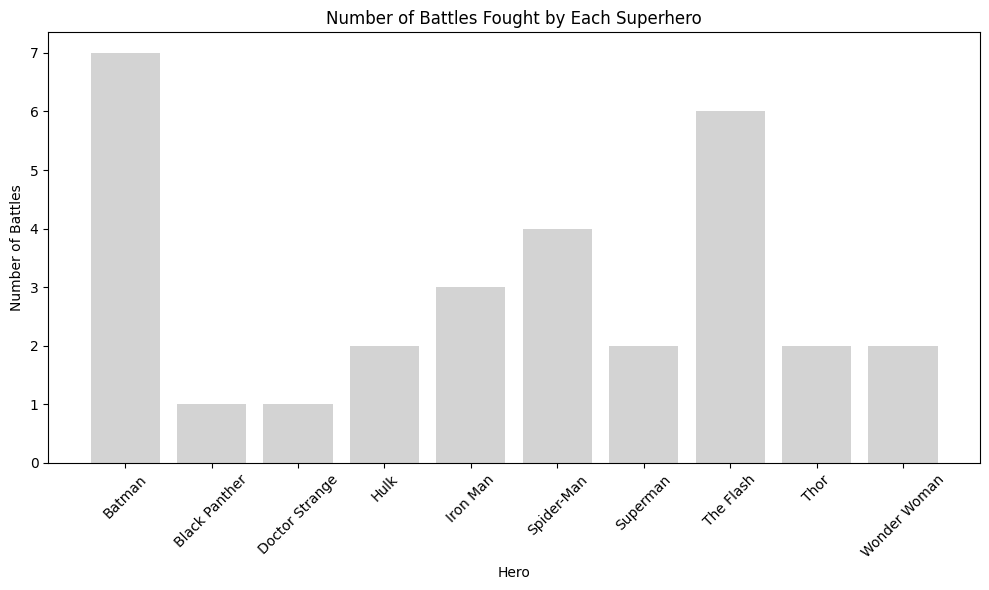

In [26]:
import pandas as pd

# Mock data from heroes and battles
heroes_data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Spider-Man', 'Iron Man', 'Batman', 'Superman', 'Thor',
             'Wonder Woman', 'Black Panther', 'The Flash', 'Hulk', 'Doctor Strange']
}
battles_data = {
    'id': list(range(1, 31)),
    'hero_id': [1, 9, 8, 5, 1, 2, 9, 3, 7, 3, 1, 2, 8, 8, 6, 1, 8, 6, 4, 3, 8, 4, 3, 8, 2, 3, 10, 3, 3, 5],
    'outcome': ['Villain Wins', 'Hero Wins', 'Draw', 'Villain Wins', 'Hero Wins', 'Villain Wins', 'Hero Wins',
                'Hero Wins', 'Hero Wins', 'Draw', 'Villain Wins', 'Draw', 'Hero Wins', 'Draw', 'Draw', 'Villain Wins',
                'Draw', 'Villain Wins', 'Hero Wins', 'Draw', 'Villain Wins', 'Draw', 'Draw', 'Villain Wins',
                'Draw', 'Draw', 'Draw', 'Draw', 'Hero Wins', 'Hero Wins']
}

heroes_df = pd.DataFrame(heroes_data)
battles_df = pd.DataFrame(battles_data)

# Merge heroes and battles data on hero_id
merged_df = pd.merge(battles_df, heroes_df, left_on='hero_id', right_on='id', how='left')

# Count the number of battles per hero
battle_counts = merged_df.groupby('name').size().reset_index(name='Battle_Count')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(battle_counts['name'], battle_counts['Battle_Count'], color='lightgrey')
plt.xlabel('Hero')
plt.ylabel('Number of Battles')
plt.title('Number of Battles Fought by Each Superhero')
plt.xticks(rotation=45)  # Rotate hero names for better visibility
plt.tight_layout()  # Adjust layout to make room for label rotations
plt.show()


Enter the name of a superhero to see their battle count (or type 'exit' to quit): Venom
Hero not found. Please check the name and try again.
Enter the name of a superhero to see their battle count (or type 'exit' to quit): Hulk
Hulk has fought in 2 battles.


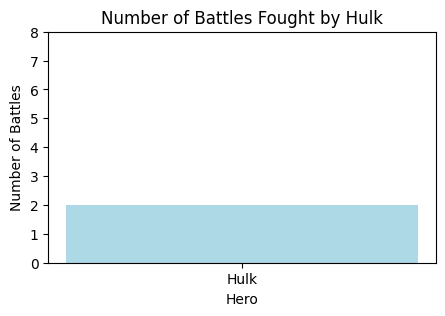

KeyboardInterrupt: Interrupted by user

In [28]:
def display_hero_battles(hero_name):
    # Normalize the input to ensure case-insensitivity and trim any extra whitespace
    hero_name = hero_name.strip().title()

    # Check if the hero exists in the DataFrame
    if hero_name in battle_counts['name'].values:
        battles = battle_counts[battle_counts['name'] == hero_name]['Battle_Count'].iloc[0]
        print(f"{hero_name} has fought in {battles} battles.")

        # Plotting the result
        plt.figure(figsize=(5, 3))
        plt.bar(hero_name, battles, color='lightblue')
        plt.xlabel('Hero')
        plt.ylabel('Number of Battles')
        plt.title(f'Number of Battles Fought by {hero_name}')
        plt.ylim(0, max(battle_counts['Battle_Count']) + 1)  # Adjust y-axis to show all battles
        plt.show()
    else:
        print("Hero not found. Please check the name and try again.")

# Continue with the user interaction loop
while True:
    user_input = input("Enter the name of a superhero to see their battle count (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting program.")
        break
    display_hero_battles(user_input)


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!